## 83

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1215


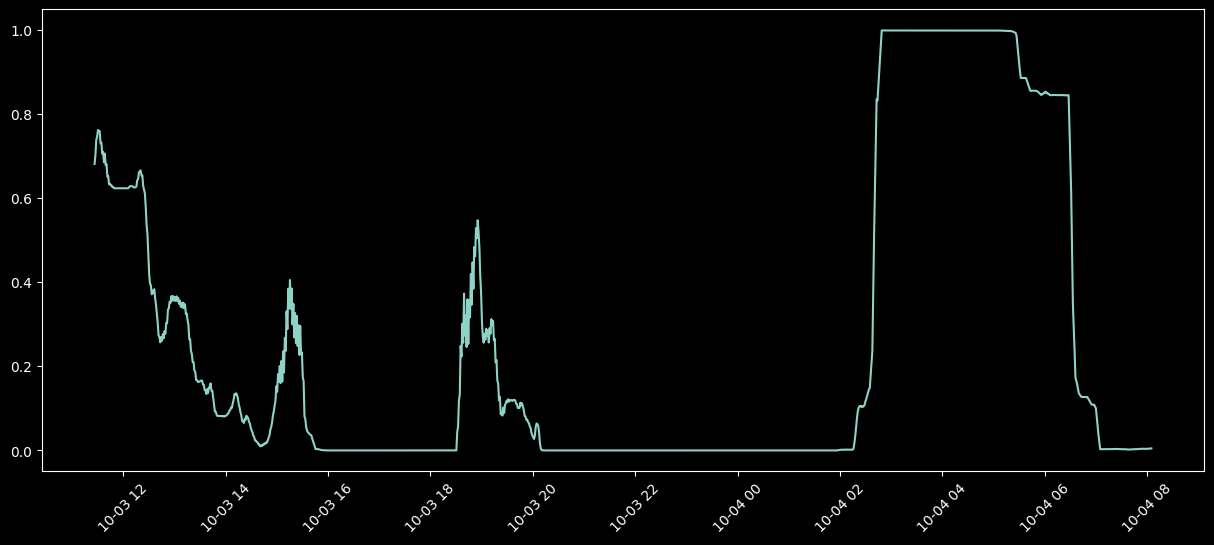

In [13]:
%load_ext autoreload
%autoreload 2
from hypopredict.fusion.ml_preproc import MLPreprocessor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pickle

path = '/Users/alexxela/code/hypopredict/hypopredict/fusion/fusion_final/FINAL_83_DEMO_TIME_ml_prepped_cv_splits_20251218_152009.pkl'
loaded_dict_test = MLPreprocessor().load_prepped_splits(path)
split_prepped_test = loaded_dict_test['splits_prepped']

# persist the index
split_prepped_test[0][0].index = split_prepped_test[0][1].index
# stack X_trains from other splits
X_test = split_prepped_test[0][0].dropna(inplace=False)



model_path = '/Users/alexxela/code/hypopredict/hypopredict/fusion/fusion_final/fusion2_1_model_trained_dict_0_267.pkl'
with open(model_path, 'rb') as f:
    models_dict = pickle.load(f)

xgb = models_dict['xgb']
svm = models_dict['svm']
knn = models_dict['knn']
fusion = models_dict['fusion']

y_probs_test_xgb = xgb.predict_proba(X_test)[:, 1]
y_probs_test_svm = svm.predict_proba(X_test)[:, 1]
y_probs_test_knn = knn.predict_proba(X_test)[:, 1]

X_test_fusion = pd.DataFrame({
    'xgb_prob': y_probs_test_xgb,
    'svm_prob': y_probs_test_svm,
    'knn_prob': y_probs_test_knn
})

y_probs_test_fusion = fusion.predict_proba(X_test_fusion)[:, 1]
y_pred_indexed = pd.Series(y_probs_test_fusion, index=X_test.index)
y_pred_indexed = y_pred_indexed.groupby(y_pred_indexed.index).median()

plt.style.use('dark_background')
print(len(y_pred_indexed))
plt.figure(figsize=(15, 6))
plt.plot(pd.Series(y_pred_indexed).rolling(5).mean())
plt.xticks(rotation=45)
plt.show()

18435


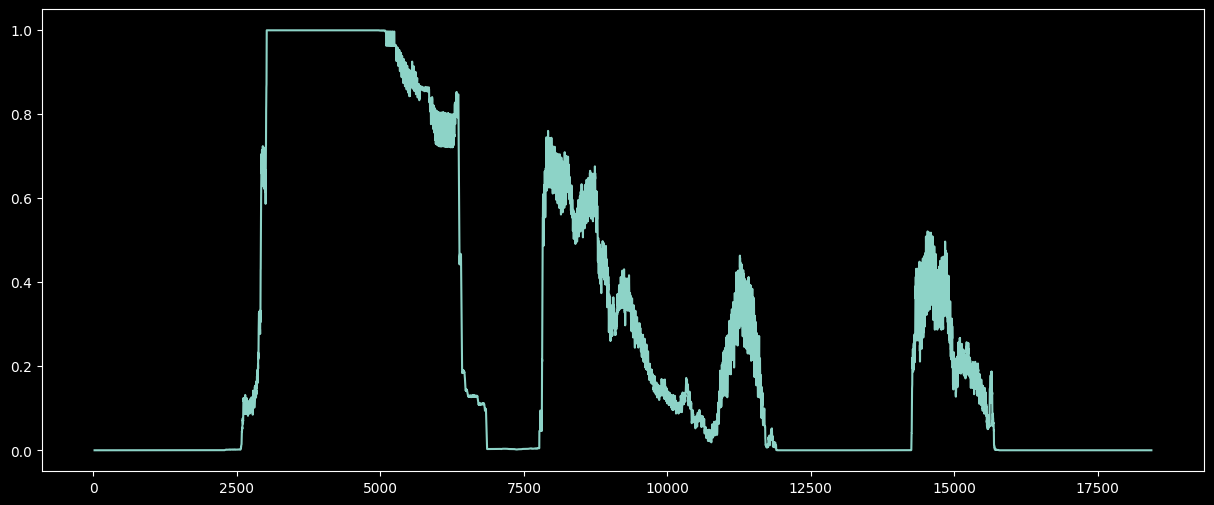

In [14]:
print(len(y_probs_test_fusion))
plt.figure(figsize=(15, 6))
plt.plot(pd.Series(y_probs_test_fusion).rolling(20).mean());

Precision-Recall AUC: 0.2226


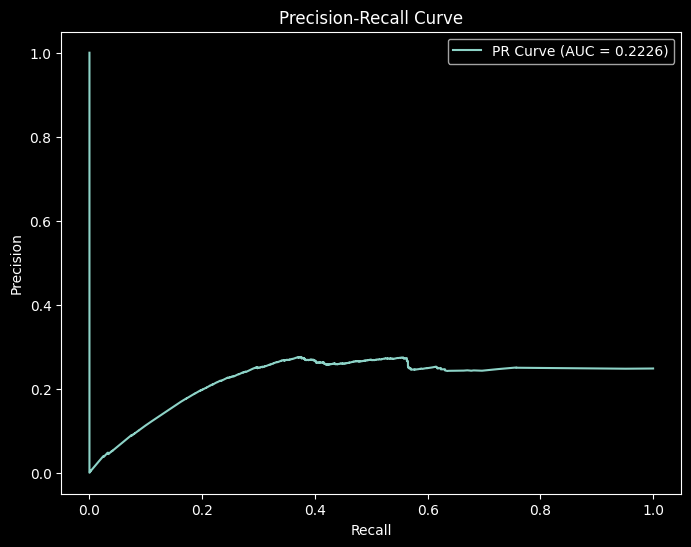

In [15]:
y_test = split_prepped_test[0][1].loc[y_pred_indexed.index]
# plot precision-recall auc and curve
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, y_probs_test_fusion)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.4f}')
# plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## 64

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
10080


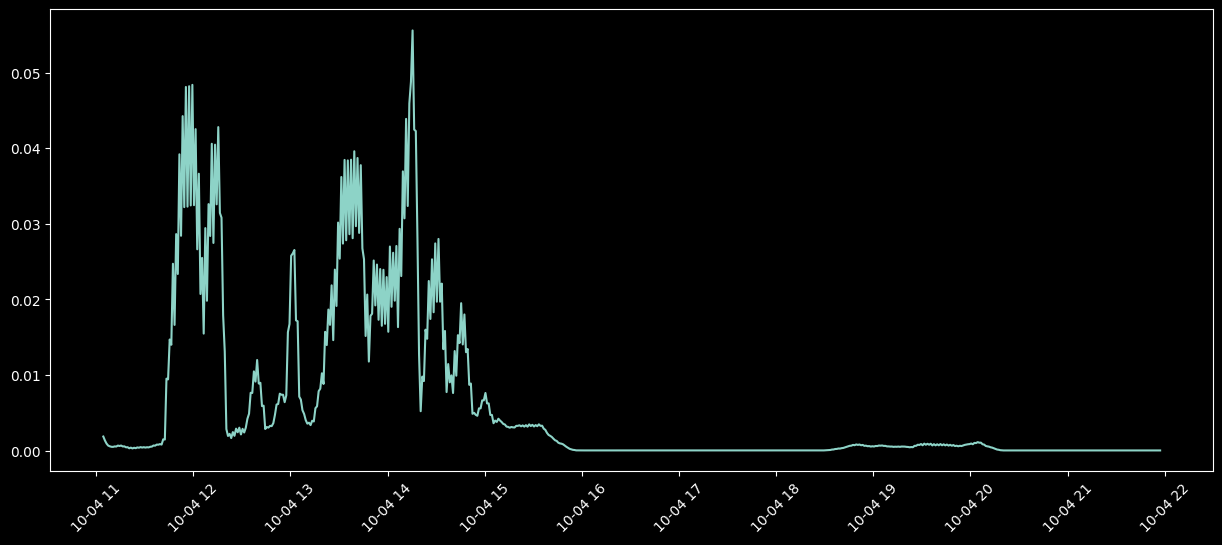

In [16]:
%load_ext autoreload
%autoreload 2
from hypopredict.fusion.ml_preproc import MLPreprocessor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pickle

path = '/Users/alexxela/code/hypopredict/hypopredict/fusion/fusion_final/FINAL_64_DEMO_TIME_ml_prepped_cv_splits_20251218_154916.pkl'
loaded_dict_test = MLPreprocessor().load_prepped_splits(path)
split_prepped_test = loaded_dict_test['splits_prepped']

# persist the index
split_prepped_test[0][0].index = split_prepped_test[0][1].index
# stack X_trains from other splits
X_test = split_prepped_test[0][0].dropna(inplace=False)


model_path = '/Users/alexxela/code/hypopredict/hypopredict/fusion/fusion_final/fusion2_1_model_trained_dict_0_267.pkl'
with open(model_path, 'rb') as f:
    models_dict = pickle.load(f)

xgb = models_dict['xgb']
svm = models_dict['svm']
knn = models_dict['knn']
fusion = models_dict['fusion']

y_probs_test_xgb = xgb.predict_proba(X_test)[:, 1]
y_probs_test_svm = svm.predict_proba(X_test)[:, 1]
y_probs_test_knn = knn.predict_proba(X_test)[:, 1]

X_test_fusion = pd.DataFrame({
    'xgb_prob': y_probs_test_xgb,
    'svm_prob': y_probs_test_svm,
    'knn_prob': y_probs_test_knn
})

y_probs_test_fusion = fusion.predict_proba(X_test_fusion)[:, 1]
y_pred_indexed = pd.Series(y_probs_test_fusion, index=X_test.index)
y_pred_indexed = y_pred_indexed.groupby(y_pred_indexed.index).median()

plt.style.use('dark_background')
print(len(y_probs_test_fusion))
plt.figure(figsize=(15, 6))
plt.plot(pd.Series(y_pred_indexed).rolling(5).mean())
plt.xticks(rotation=45)
plt.show()

10080


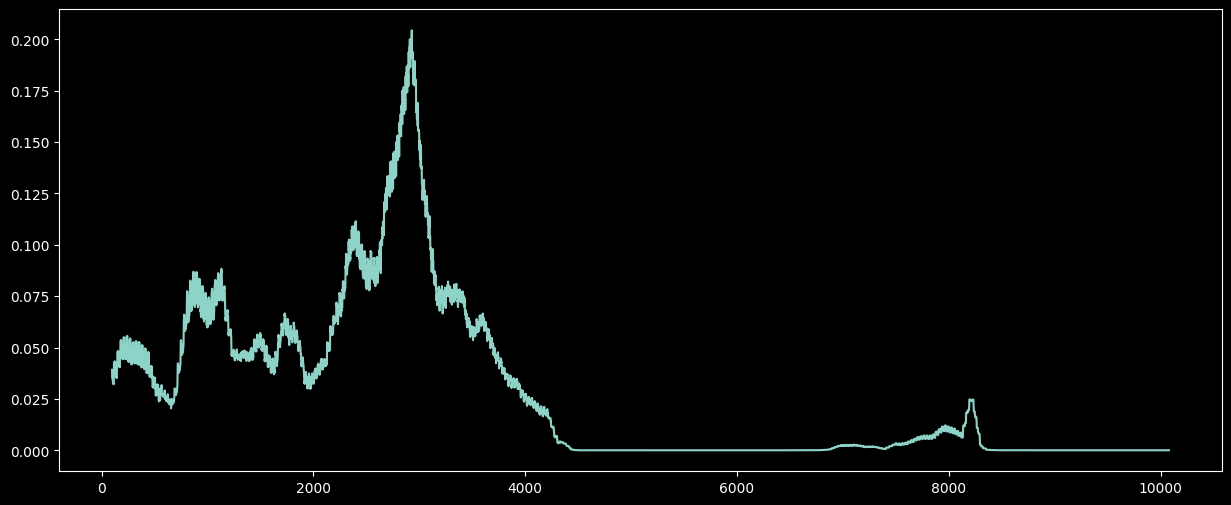

In [17]:
print(len(y_probs_test_fusion))
plt.figure(figsize=(15, 6))
plt.plot(pd.Series(y_probs_test_fusion).rolling(100).mean());

Precision-Recall AUC: 0.2049


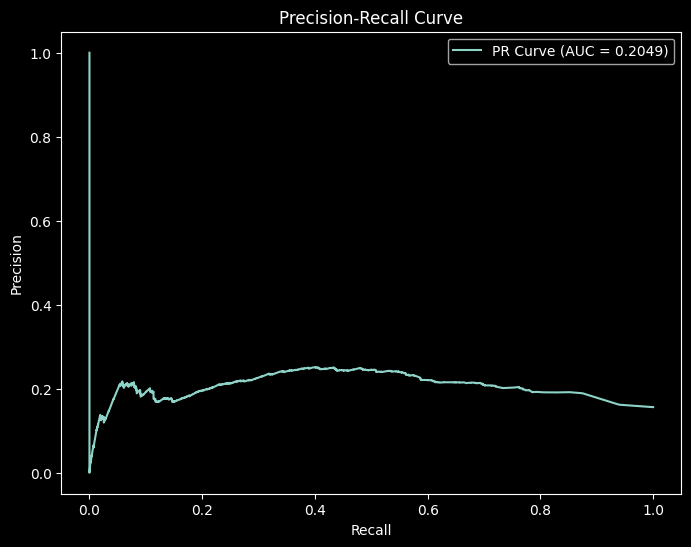

In [18]:
y_test = split_prepped_test[0][1].loc[y_pred_indexed.index]
# plot precision-recall auc and curve
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, y_probs_test_fusion)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.4f}')
# plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

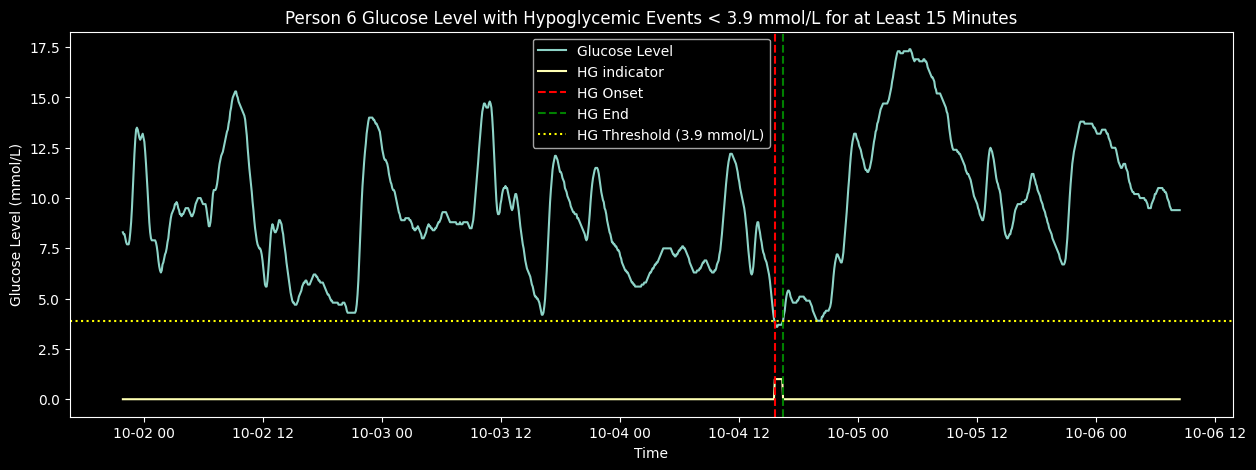

In [19]:
import hypopredict.compressor as comp
ID = 6
person = {"ID": ID}

person["glucose"] = comp.gdrive_to_pandas(comp.GLUCOSE_ID_LINKS[ID - 1])
person["hg_events"] = comp.identify_hg_events(
    person["glucose"], min_duration=15, threshold=3.9
)

comp.plot_hg_events(person)

In [21]:
from hypopredict.core.person import Person

In [23]:

import os


ID = 6
person = Person(ID=ID)
person.ecg_dir = os.getenv('ECG_PATH')
person.load_HG_data(glucose_src='local')
person.load_ECG_day(63)

In [25]:
person.ecg

{63: Empty DataFrame
 Columns: []
 Index: []}